In [2]:
# detect written language origin with spacy for paper titles

# https://spacy.io/universe/project/spacy-langdetect

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

import pandas as pd
import warnings

warnings.simplefilter(action='ignore')

source_df = pd.read_csv('data/metadata.csv')[['cord_uid', 'title', 'abstract']]

source_df.head(3)

cord_uid                                              title  \
0  ug7v899j  Clinical features of culture-proven Mycoplasma...   
1  02tnwd4m  Nitric oxide: a pro-inflammatory mediator in l...   
2  ejv2xln0    Surfactant protein-D and pulmonary host defense   

                                            abstract  
0  OBJECTIVE: This retrospective chart review des...  
1  Inflammatory diseases of the respiratory tract...  
2  Surfactant protein-D (SP-D) participates in th...

In [3]:
import spacy
from spacy_langdetect import LanguageDetector

nlp = spacy.load('en_core_web_sm')

nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

# document level language detection. Think of it like average language of the document!


docs = []

for title in source_df['title']:
    doc = nlp(str(title))
    docs.append(doc)

In [4]:
langs = []

for doc in docs:
    langs.append(doc._.language)

In [5]:
out = pd.DataFrame(langs) 
out.head(3)

language     score
0       en  0.999997
1       en  0.857141
2       en  0.999997

In [6]:
# out.to_csv('data/langs.csv', index = False, header=True)

In [7]:
counted_df = out['language'].value_counts().rename_axis('lang').reset_index(name='count')
counted_df.head(10)

lang   count
0   en  149685
1   de    2116
2   fr    1756
3   es    1337
4   it     962
5   ca     574
6   ro     430
7   nl     348
8   pt     259
9   af     233

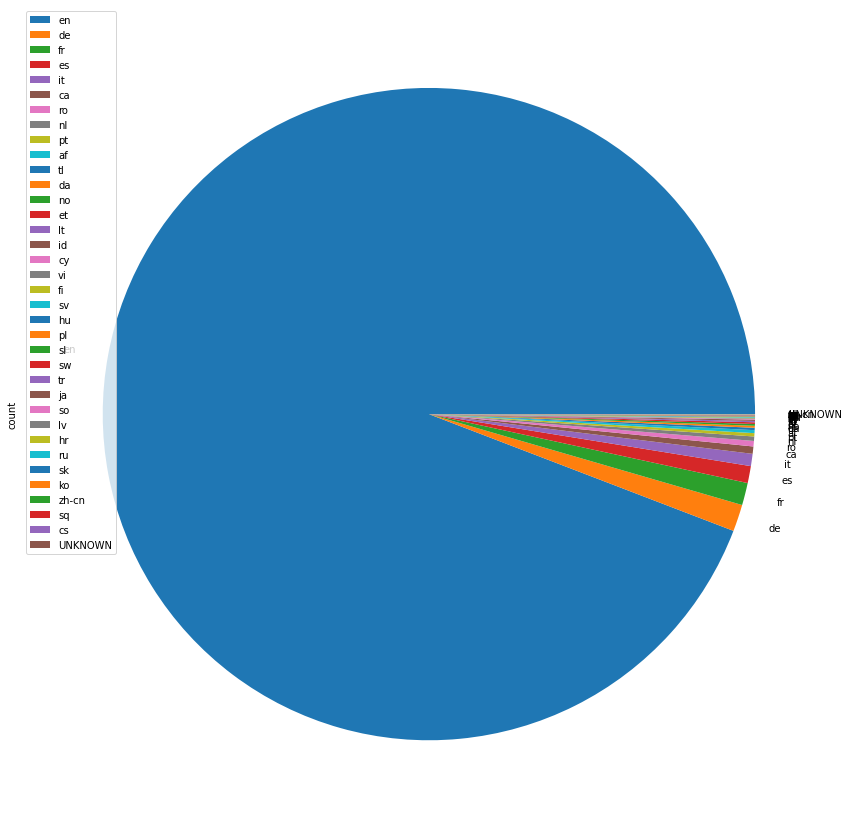

In [8]:
plot = counted_df.set_index('lang').plot.pie(x='lang',y='count', figsize=(15, 15))

In [9]:
plot.get_figure().savefig('langs.svg', format='svg')